In [ ]:
import littlelearn as ll
from littlelearn import DeepLearning  as dl
import numpy as np

In [ ]:
import yfinance as yf

In [ ]:
data = yf.download("AAPL", start="2017-01-01", end="2020-01-01")

/tmp/ipython-input-2902923097.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2017-01-01", end="2020-01-01")
[*********************100%***********************]  1 of 1 completed


In [ ]:
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2017-01-03,26.796837,26.838365,26.476152,26.716089,115127600
2017-01-04,26.766838,26.879887,26.704547,26.727618,84472400
2017-01-05,26.902962,26.960639,26.718394,26.743772,88774400
2017-01-06,27.202885,27.260562,26.870663,26.942183,127007600
2017-01-09,27.452047,27.553560,27.209804,27.212110,134247600
...,...,...,...,...,...
2019-12-24,68.654984,68.804728,68.328946,68.756422,48478800
2019-12-26,70.017128,70.034036,68.758846,68.787826,93121200


In [ ]:
data[("Volume","AAPL")] = ll.preprocessing.MinMaxScaller(f_range=(1,10)).fit_scaling(data.Volume['AAPL'].values)

In [ ]:
x_train = data.drop([('Close','AAPL')],axis=1).values
y_train = data.Close['AAPL'].values.reshape(-1,1)


In [ ]:
sample_scaling= ll.preprocessing.StandardScaller().fit_scaling(data.Volume['AAPL'].values)

In [ ]:
import matplotlib.pyplot as plt


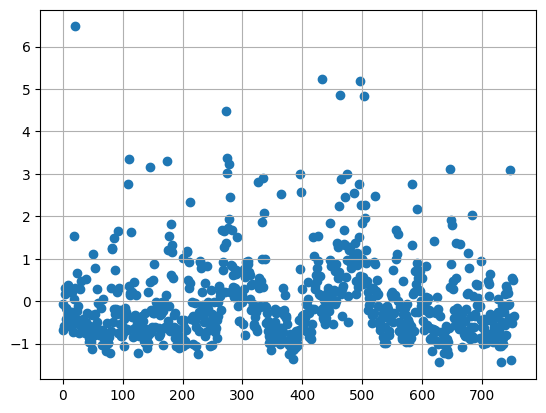

In [ ]:
plt.scatter (np.arange(len(sample_scaling)),sample_scaling)
plt.grid(True)
plt.show()

In [ ]:
sample_scaling2 = ll.preprocessing.MinMaxScaller(f_range=(1,100)).fit_scaling(data.Volume['AAPL'].values)

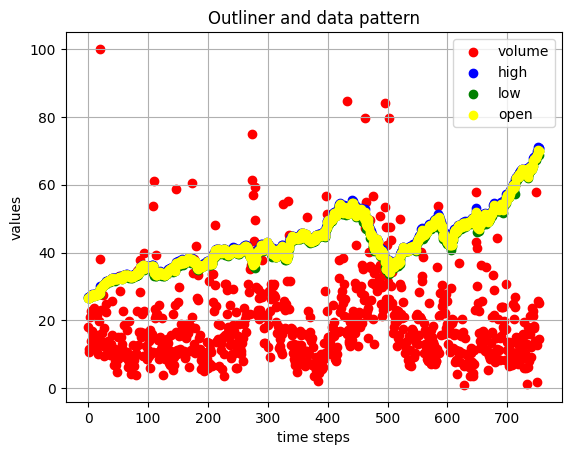

In [ ]:
plt.title("Outliner and data pattern")
plt.xlabel('time steps')
plt.ylabel("values")
plt.scatter(np.arange(len(sample_scaling2)),sample_scaling2,color='red',label='volume')
plt.scatter(np.arange(len(data.High.AAPL.values)),data.High.AAPL.values,color='blue',label='high')
plt.scatter(np.arange(len(data.Low.AAPL.values)),data.Low.AAPL.values,color='green',label='low')
plt.scatter(np.arange(len(data.Open.AAPL.values)),data.Open.AAPL.values,color='yellow',label='open')
plt.legend()
plt.grid(True)
plt.show()

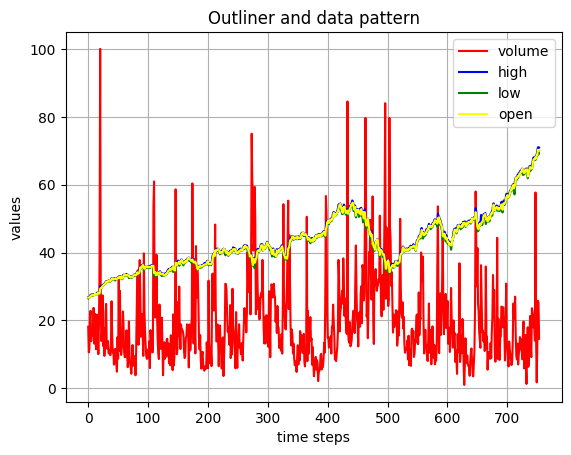

In [ ]:
plt.title("Outliner and data pattern")
plt.xlabel('time steps')
plt.ylabel("values")
plt.plot(sample_scaling2,color='red',label='volume')
plt.plot(data.High.AAPL.values,color='blue',label='high')
plt.plot(data.Low.AAPL.values,color='green',label='low')
plt.plot(data.Open.AAPL.values,color='yellow',label='open')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
sample_scaling4 = sample_scaling2 - sample_scaling2 * 0.01

In [ ]:
effect_scaling = sample_scaling2 * 0.01

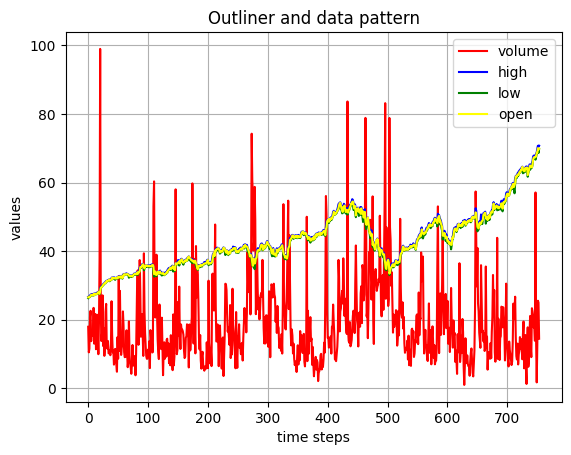

In [ ]:
plt.title("Outliner and data pattern")
plt.xlabel('time steps')
plt.ylabel("values")
plt.plot(sample_scaling4,color='red',label='volume')
plt.plot(data.High.AAPL.values - effect_scaling,color='blue',label='high')
plt.plot(data.Low.AAPL.values - effect_scaling,color='green',label='low')
plt.plot(data.Open.AAPL.values - effect_scaling,color='yellow',label='open')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
class LCM_Forecast :
  def __init__ (self,d_model : int ) :
    self.projection = dl.layers.Dense(d_model)
    self.block1 = dl.layers.LatenConnectedBlock(units=d_model,laten_activation='gelu')
    self.block2 = dl.layers.LatenConnectedBlock(units=d_model,laten_activation='gelu')
    self.linear1 = dl.layers.Dense(128,activation='relu')
    self.linear2 = dl.layers.Dense(256,activation='relu')
    self.out = dl.layers.Dense(1,activation='linear')
    self.node = [self.projection,self.block1,self.block2,self.linear1,self.linear2,self.out]

  def get_weight(self) :
    weight = list()
    for node in self.node :
      wg = node.get_weight()
      if wg is not None  :
        for w in wg :
          weight.append(w)
    return weight

  def __call__ (self,x) :
    x = self.projection(x)
    x = self.block1(x)
    x = self.block2(x)
    x = self.linear1(x)
    x = self.linear2(x)
    return self.out(x)

In [ ]:
subject_model1 = LCM_Forecast(64)
subject_model1(x_train[:1])
loss_fn = dl.loss.MeanSquareError()
optimizer_fn = dl.optimizers.Adam(learning_rate=5e-3)
optimizer_fn.apply_weight(subject_model1.get_weight())

In [ ]:
loss_record = list()

In [ ]:
epochs = 100
for epoch in range(epochs) :
  y_pred = subject_model1(x_train)
  loss = loss_fn(y_train,y_pred)
  loss.backwardpass()
  optimizer_fn.forward_in_weight()
  loss.kill_grad()
  loss_record.append(loss.get_tensor())
  print(f"epoch : {epoch + 1} / {epochs} | loss : {loss.get_tensor():.6f}")

epoch : 1 / 100 | loss : 2.216137
epoch : 2 / 100 | loss : 3.909350
epoch : 3 / 100 | loss : 4.154572
epoch : 4 / 100 | loss : 4.835316
epoch : 5 / 100 | loss : 3.076590
epoch : 6 / 100 | loss : 1.359694
epoch : 7 / 100 | loss : 0.677242
epoch : 8 / 100 | loss : 1.599727
epoch : 9 / 100 | loss : 2.642039
epoch : 10 / 100 | loss : 2.229122
epoch : 11 / 100 | loss : 1.575819
epoch : 12 / 100 | loss : 0.775692
epoch : 13 / 100 | loss : 0.434623
epoch : 14 / 100 | loss : 0.560639
epoch : 15 / 100 | loss : 0.910215
epoch : 16 / 100 | loss : 1.144315
epoch : 17 / 100 | loss : 0.919932
epoch : 18 / 100 | loss : 0.581960
epoch : 19 / 100 | loss : 0.392660
epoch : 20 / 100 | loss : 0.478759
epoch : 21 / 100 | loss : 0.737211
epoch : 22 / 100 | loss : 0.987484
epoch : 23 / 100 | loss : 1.235994
epoch : 24 / 100 | loss : 1.238845
epoch : 25 / 100 | loss : 1.152145
epoch : 26 / 100 | loss : 0.808143
epoch : 27 / 100 | loss : 0.505017
epoch : 28 / 100 | loss : 0.369237
epoch : 29 / 100 | loss : 0.4

In [ ]:
import matplotlib.pyplot as plt


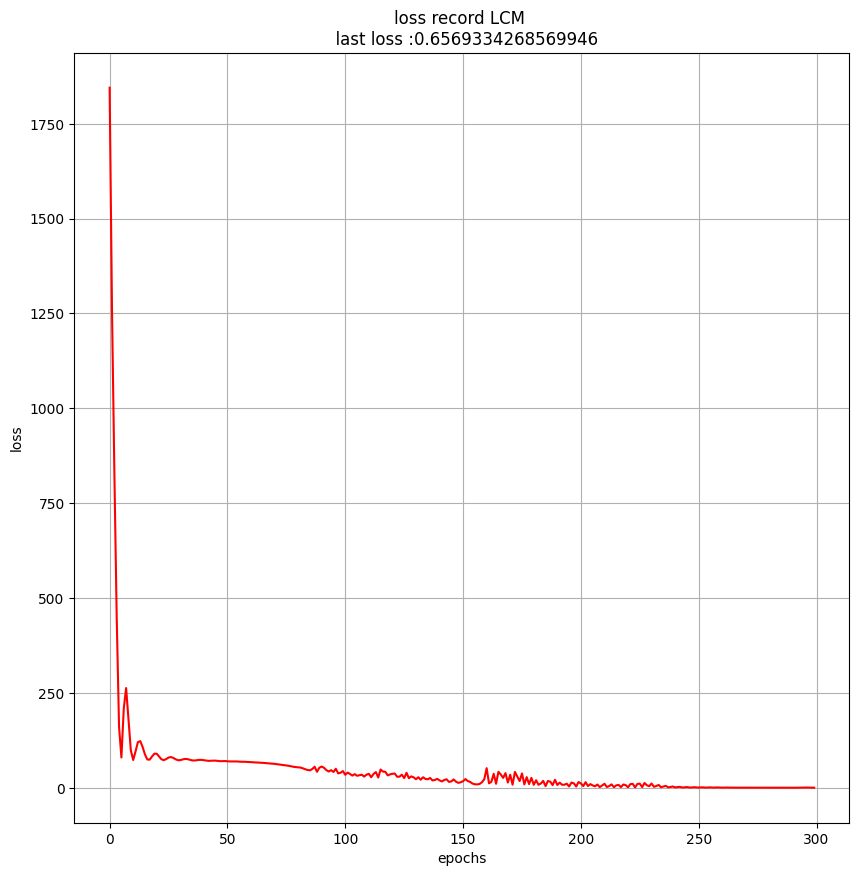

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.title(f"loss record LCM \n  last loss :{loss_record[-1]}")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(loss_record,color='red')
plt.grid(True)
plt.show()

In [ ]:
subject_model1(x_train)

(Tensor with shape : ((754, 1)) : 
  [[28.17367 ]
 [28.105413]
 [28.165321]
 [28.460573]
 [28.708403]
 [28.730125]
 [28.792677]
 [28.75825 ]
 [28.781275]
 [28.848688]
 [28.94081 ]
 [28.840696]
 [29.062017]
 [28.962107]
 [28.83954 ]
 [29.21045 ]
 [29.304245]
 [29.305994]
 [29.191278]
 [29.245775]
 [28.655983]
 [30.587713]
 [30.531878]
 [30.75746 ]
 [31.061808]
 [31.044395]
 [31.264704]
 [31.27083 ]
 [31.439991]
 [31.66    ]
 [31.964537]
 [31.855396]
 [31.749063]
 [31.962488]
 [31.97181 ]
 [32.12374 ]
 [31.924116]
 [32.08057 ]
 [32.086624]
 [32.466053]
 [32.65357 ]
 [32.39475 ]
 [32.479057]
 [32.37784 ]
 [32.363987]
 [32.407097]
 [32.38991 ]
 [32.29284 ]
 [32.337444]
 [32.5927  ]
 [32.638485]
 [32.84023 ]
 [32.673386]
 [33.15466 ]
 [32.68593 ]
 [32.760548]
 [32.854946]
 [32.639557]
 [33.04034 ]
 [33.289185]
 [33.26705 ]
 [33.189373]
 [33.17617 ]
 [33.16763 ]
 [33.40205 ]
 [33.28663 ]
 [33.11708 ]
 [33.13318 ]
 [33.295902]
 [32.83485 ]
 [32.8597  ]
 [32.742386]
 [32.69581 ]
 [32.853714]
 

In [ ]:
y_train

array([[26.79683685],
       [26.76683807],
       [26.90296173],
       [27.20288467],
       [27.45204735],
       [27.47973251],
       [27.62738609],
       [27.51203156],
       [27.46358299],
       [27.68505859],
       [27.68275642],
       [27.63430786],
       [27.68505859],
       [27.70352554],
       [27.67814445],
       [28.11879349],
       [28.13263321],
       [28.13494301],
       [28.06111717],
       [27.996521  ],
       [29.70376968],
       [29.65301132],
       [29.7799015 ],
       [30.05905533],
       [30.34513474],
       [30.4628067 ],
       [30.68291283],
       [30.61340714],
       [30.88450813],
       [31.28536797],
       [31.3989048 ],
       [31.36183548],
       [31.44756317],
       [31.67464447],
       [31.76963997],
       [31.63524628],
       [31.66535759],
       [31.72791862],
       [31.74183464],
       [32.39061356],
       [32.19830322],
       [32.38829422],
       [32.28635406],
       [32.32806015],
       [32.20756149],
       [32